<a href="https://colab.research.google.com/github/Jessekato/Econometrics/blob/main/(No_9694)_FE_GWP_1_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finacial Econometrics Group Work Project 1, Group No.9694

### ◆ Group Work Template Link

https://docs.google.com/document/d/1aKrwUlj4_1KcWDm_dY9lx0IN1PPNfA1u/edit?usp=sharing&ouid=110978013301762367878&rtpof=true&sd=true


# Problem 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Problem 1d) Simulation to demonstrate omitted variable bias
# Set random seed for reproducibility
np.random.seed(42)

# Sample sizes to test
sample_sizes = [100, 500, 1000, 5000]
results = []

for n in sample_sizes:
    # Generate X and Z that are correlated (not independent)
    # This is crucial for demonstrating omitted variable bias
    X = np.random.normal(0, 1, n)
    Z = 0.6 * X + np.random.normal(0, 0.8, n)  # Z is correlated with X

    # Generate error term e (independent of X and Z)
    e = np.random.normal(0, 1, n)

    # Known true parameters
    a_true = 2.0  # intercept
    b_true = 1.5  # coefficient for X
    c_true = 0.8  # coefficient for Z

    # True model: Y = a + bX + cZ + e
    Y = a_true + b_true * X + c_true * Z + e

    # Model 1: Correct model with both predictors
    X_full = np.column_stack([X, Z])
    model_full = LinearRegression().fit(X_full, Y)
    b_estimate_full = model_full.coef_[0]  # coefficient for X in full model

    # Model 2: Omitted variable model (only X)
    X_reduced = X.reshape(-1, 1)
    model_reduced = LinearRegression().fit(X_reduced, Y)
    b_estimate_reduced = model_reduced.coef_[0]  # coefficient for X in reduced model

    # Calculate correlation between X and Z
    correlation_XZ = np.corrcoef(X, Z)[0, 1]

    results.append({
        'Sample_Size': n,
        'True_b': b_true,
        'b_Full_Model': b_estimate_full,
        'b_Reduced_Model': b_estimate_reduced,
        'Bias': b_estimate_reduced - b_true,
        'Correlation_XZ': correlation_XZ,
        'Intercept_Full': model_full.intercept_,
        'Intercept_Reduced': model_reduced.intercept_
    })

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results)
print("Simulation Results: Effect of Omitting Variable Z")
print("=" * 60)
print(results_df.round(4))

print("\nAnalysis:")
print("- True coefficient b =", b_true)
print("- True coefficient c =", c_true)
print("- When Z is omitted, the estimate of b is biased")
print("- The bias persists even as sample size increases")
print("- This demonstrates that omitted variable bias is a problem that cannot be solved by increasing sample size")

Simulation Results: Effect of Omitting Variable Z
   Sample_Size  True_b  b_Full_Model  b_Reduced_Model    Bias  Correlation_XZ  \
0          100     1.5        1.7353           2.1162  0.6162          0.5038   
1          500     1.5        1.4651           1.9309  0.4309          0.5990   
2         1000     1.5        1.5108           2.0165  0.5165          0.5913   
3         5000     1.5        1.4817           1.9645  0.4645          0.6029   

   Intercept_Full  Intercept_Reduced  
0          2.0886             2.0933  
1          2.0737             2.1440  
2          1.9338             1.9291  
3          2.0202             2.0243  

Analysis:
- True coefficient b = 1.5
- True coefficient c = 0.8
- When Z is omitted, the estimate of b is biased
- The bias persists even as sample size increases
- This demonstrates that omitted variable bias is a problem that cannot be solved by increasing sample size


Correlation Analysis for Different Cases:
Case 1: Z is correlated with X
Correlation between X and Z: 0.571508

Case 2: Z is orthogonal to X
Correlation between X and Z: 0.000109

Case 3: Z is orthogonal to both X and W
Correlation between X and Z: -0.001313
Correlation between W and Z: -0.001227

Conclusion:
When Z is orthogonal (uncorrelated) to X and W, omitting Z from the regression
will not bias the estimates of the coefficients for X and W.
This is the special case mentioned in Problem 1c where the estimates would be the same.
In mathematical terms, when cov(Z,X) = 0 and cov(Z,W) = 0, omitting Z doesn't bias the estimates.


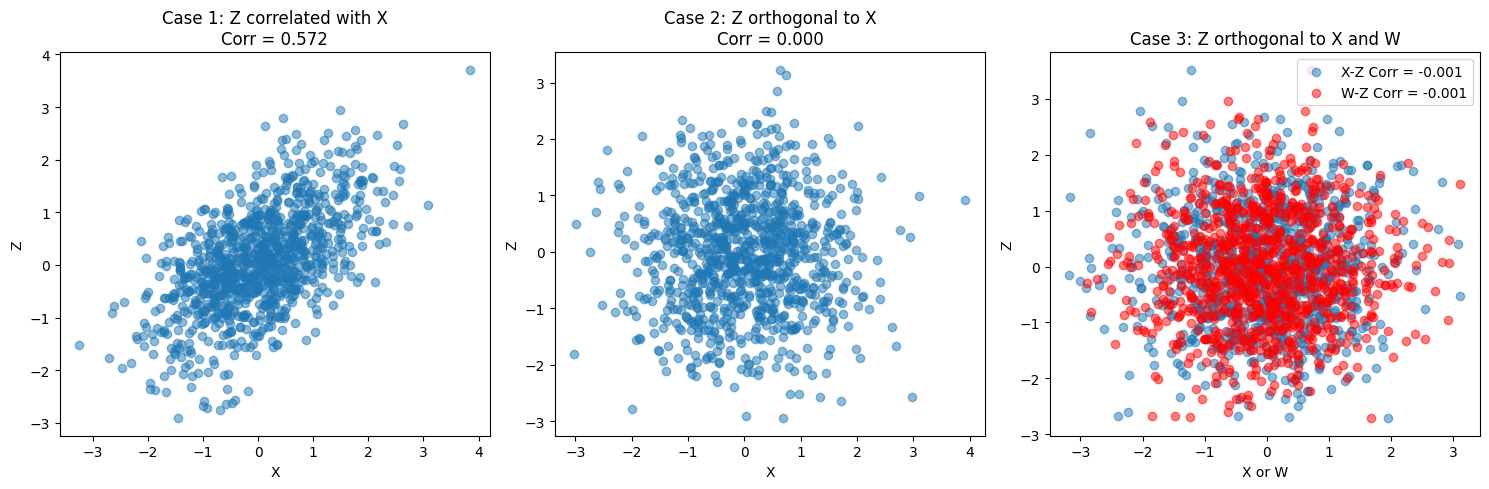

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1c) Simulation to demonstrate when omitted variable bias doesn't occur
# Set random seed for reproducibility
np.random.seed(42)

# Sample size
n = 1000

# Case 1: Z is correlated with X (omitted variable bias occurs)
X1 = np.random.normal(0, 1, n)
Z1 = 0.6 * X1 + np.random.normal(0, 0.8, n)  # Z is correlated with X
corr1 = np.corrcoef(X1, Z1)[0, 1]

# Case 2: Z is orthogonal to X (no omitted variable bias)
X2 = np.random.normal(0, 1, n)
Z2_temp = np.random.normal(0, 1, n)
# Make Z2 orthogonal to X2 using Gram-Schmidt process
Z2 = Z2_temp - (np.dot(Z2_temp, X2) / np.dot(X2, X2)) * X2
corr2 = np.corrcoef(X2, Z2)[0, 1]

# Case 3: Z is orthogonal to both X and W (no omitted variable bias in multiple regression)
X3 = np.random.normal(0, 1, n)
W3 = np.random.normal(0, 1, n)
Z3_temp = np.random.normal(0, 1, n)
# Project out both X3 and W3 from Z3
X3W3 = np.column_stack([X3, W3])
beta = np.linalg.lstsq(X3W3, Z3_temp, rcond=None)[0]
Z3 = Z3_temp - X3W3 @ beta
corr3_X = np.corrcoef(X3, Z3)[0, 1]
corr3_W = np.corrcoef(W3, Z3)[0, 1]

print("Correlation Analysis for Different Cases:")
print("=" * 60)
print(f"Case 1: Z is correlated with X")
print(f"Correlation between X and Z: {corr1:.6f}")
print("\nCase 2: Z is orthogonal to X")
print(f"Correlation between X and Z: {corr2:.6f}")
print("\nCase 3: Z is orthogonal to both X and W")
print(f"Correlation between X and Z: {corr3_X:.6f}")
print(f"Correlation between W and Z: {corr3_W:.6f}")

# Visualize the relationships
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X1, Z1, alpha=0.5)
plt.title(f'Case 1: Z correlated with X\nCorr = {corr1:.3f}')
plt.xlabel('X')
plt.ylabel('Z')

plt.subplot(1, 3, 2)
plt.scatter(X2, Z2, alpha=0.5)
plt.title(f'Case 2: Z orthogonal to X\nCorr = {corr2:.3f}')
plt.xlabel('X')
plt.ylabel('Z')

plt.subplot(1, 3, 3)
plt.scatter(X3, Z3, alpha=0.5, label=f'X-Z Corr = {corr3_X:.3f}')
plt.scatter(W3, Z3, alpha=0.5, color='red', label=f'W-Z Corr = {corr3_W:.3f}')
plt.title('Case 3: Z orthogonal to X and W')
plt.xlabel('X or W')
plt.ylabel('Z')
plt.legend()

plt.tight_layout()

print("\nConclusion:")
print("When Z is orthogonal (uncorrelated) to X and W, omitting Z from the regression")
print("will not bias the estimates of the coefficients for X and W.")
print("This is the special case mentioned in Problem 1c where the estimates would be the same.")
print("In mathematical terms, when cov(Z,X) = 0 and cov(Z,W) = 0, omitting Z doesn't bias the estimates.")

# Problem 3 (Jesse I)

Effect_of_an_Outlier_on_OLS_Regression

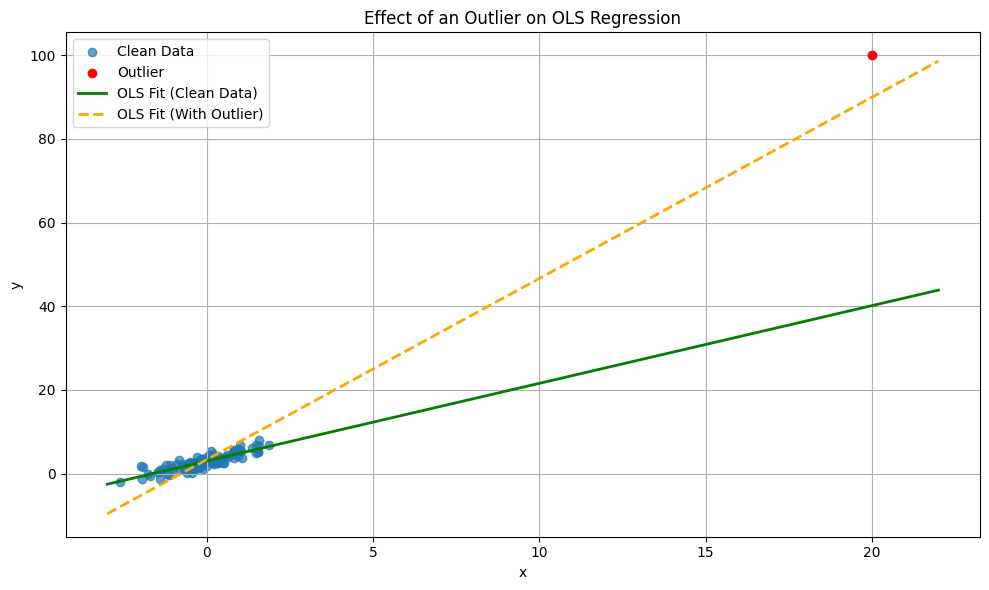

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.761
 Model:                            OLS   Adj. R-squared:                  0.759
 Method:                 Least Squares   F-statistic:                     312.2
 Date:                Mon, 16 Jun 2025   Prob (F-statistic):           3.14e-32
 Time:                        12:16:11   Log-Likelihood:                -135.71
 No. Observations:                 100   AIC:                             275.4
 Df Residuals:                      98   BIC:                             280.6
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate clean data
n = 100
x = np.random.normal(0, 1, n)                     # this is Predictor variable
epsilon = np.random.normal(0, 1, n)               # Noise
y = 3 + 2 * x + epsilon                           # Linear relationship

# Step 2: Fiting OLS model on clean data
X_clean = sm.add_constant(x)
model_clean = sm.OLS(y, X_clean).fit()

# Step 3: Adding one outlier
x_outlier = np.append(x, 20)
y_outlier = np.append(y, 100)

# Step 4: Fit OLS model on data with outlier
X_outlier = sm.add_constant(x_outlier)
model_outlier = sm.OLS(y_outlier, X_outlier).fit()

# Step 5: Plot both models
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Clean Data', alpha=0.7)
plt.scatter(20, 100, color='red', label='Outlier', zorder=5)

x_range = np.linspace(-3, 22, 100)
X_range = sm.add_constant(x_range)
y_pred_clean = model_clean.predict(X_range)
y_pred_outlier = model_outlier.predict(X_range)

plt.plot(x_range, y_pred_clean, label='OLS Fit (Clean Data)', color='green', linewidth=2)
plt.plot(x_range, y_pred_outlier, label='OLS Fit (With Outlier)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of an Outlier on OLS Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output regression summaries
model_clean.summary(), model_outlier.summary()


# Problem 3 (Miyoko Shimura)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Load the uploaded CSV file
file_path = 'FE-GWP1_model_selection_2.csv'
df = pd.read_csv(file_path)

df.head()

,Y,Z1,Z2,Z3,Z4,Z5
0,2.172296,0.121634,-0.051562,0.570616,1.279931,0.075233
1,0.502380,0.025446,-0.093062,0.304875,-0.582292,0.377388
2,0.711362,-0.136716,-0.082229,-0.191680,-0.647970,1.230986
3,-0.557168,-0.284459,-0.170922,-0.853670,-1.256146,-0.991686
4,1.500199,0.105205,-0.169141,0.826558,0.640945,1.099873


In [ ]:
print(df.columns.tolist())

['Y', 'Z1 ', 'Z2', 'Z3', 'Z4', 'Z5']


In [ ]:
df.columns = df.columns.str.strip()

# Define response and predictors
y = df['Y']
X = df[['Z1', 'Z2', 'Z3', 'Z4', 'Z5']]

# Add constant term for intercept
X_with_const = sm.add_constant(X)

# Fit the full model
model = sm.OLS(y, X_with_const).fit()

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

model_summary = model.summary()
vif_data, model_summary

(  feature       VIF
 0   const  1.614501
 1      Z1  1.026366
 2      Z2  1.022433
 3      Z3  1.013241
 4      Z4  1.003538
 5      Z5  1.014190,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      Y   R-squared:                       0.994
 Model:                            OLS   Adj. R-squared:                  0.994
 Method:                 Least Squares   F-statistic:                     3062.
 Date:                Thu, 12 Jun 2025   Prob (F-statistic):          2.07e-102
 Time:                        15:03:12   Log-Likelihood:                 88.951
 No. Observations:                 100   AIC:                            -165.9
 Df Residuals:                      94   BIC:                            -150.3
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
  

$$
\hat{y} = 1.0097 - 0.04487x_1 - 0.2987x_2 - 0.4065x_3 + 1.0082x_4 - 0.2572x_5
$$

The p-value for Z1 is 0.000, which is well below the typical threshold of 0.05. This indicates that Z1 is statistically significantly associated with Y, after accounting for the other variables. In addition, the t-statistic for Z1 is 7.781, which is far from zero. This supports the conclusion that the coefficient of Z1 is significantly different from zero.

The 95% confidence interval for Z1’s coefficient is [0.334, 0.563], which does not include 0. This further confirms that Z1 has a statistically significant effect on Y.

Similarly, Z2, Z3, Z4, and Z5 all have p-values of 0.000, which means they are also statistically significant predictors of Y.

The model also performs exceptionally well overall. The R-squared value is 0.994, and the adjusted R-squared is also 0.994, meaning that 99.4% of the variance in Y is explained by the model. Such a high R-squared value indicates excellent model fit, leaving little reason to simplify or reduce the number of predictors.

# Conslusion

In this case, there is no need to use backward or forward selection to eliminate variables.

The regression results show that all predictors (Z1 through Z5) have very low p-values, all equal to 0.000, which indicates that each variable is statistically significant at the conventional 5% level. Their t-statistics are large in absolute value, suggesting strong evidence against the null hypothesis that their coefficients are zero. Additionally, the 95% confidence intervals for each coefficient do not include zero, further supporting their relevance in the model.

Because all variables contribute significantly to explaining the variation in the dependent variable Y, there is no justification for removing any of them. Variable selection procedures like backward or forward elimination are typically used when some predictors show weak or no statistical significance, or when simplifying the model is necessary due to multicollinearity or overfitting concerns. However, in your current model, none of these issues are apparent, so variable elimination is not required.


## **5B: S&P_500_Stationarity_Test_with_ADF**

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


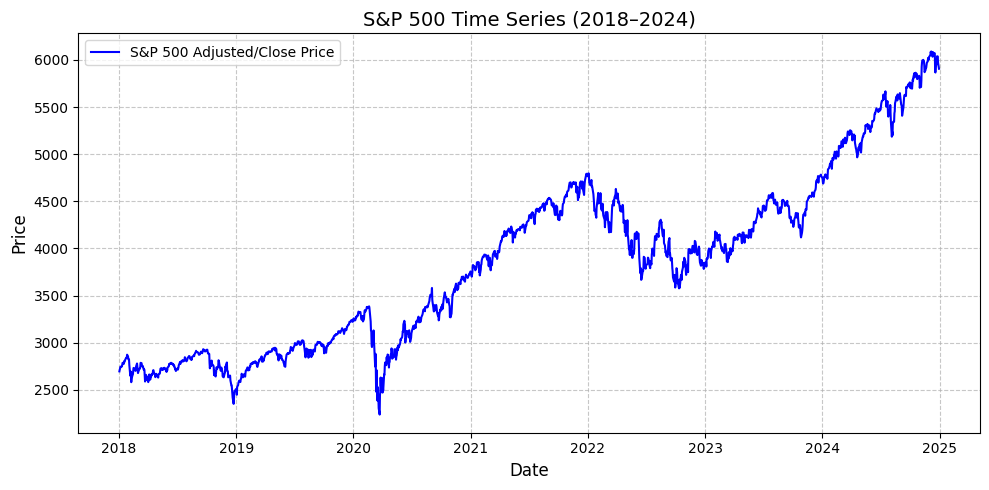


--- Augmented Dickey-Fuller Test Results ---
ADF Statistic: 0.10061403481501167
p-value: 0.9661029920901631
Critical Values: {'1%': np.float64(-3.4340943816187823), '5%': np.float64(-2.8631939359068803), '10%': np.float64(-2.5676505066098376)}

--- Interpretation ---
To determine stationarity:
1. Compare the 'ADF Statistic' to the 'Critical Values'.
   If ADF Statistic < Critical Value (e.g., at 5%), reject H0 (series is stationary).
2. Alternatively, compare the 'p-value' to a significance level (e.g., 0.05).
   If p-value < 0.05, reject H0 (series is stationary).
   If p-value >= 0.05, fail to reject H0 (series is non-stationary, has a unit root).


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- Step 1: Download real economic data for equities (e.g., S&P 500 Index) ---
# We use Yahoo Finance to get daily closing prices for the S&P 500.
# The '^GSPC' ticker symbol represents the S&P 500 index.
# We download 'Adj Close' prices, which are adjusted for splits and dividends,
# providing a consistent view of historical value.

try:
    # Attempt to download the S&P 500 data
    data = yf.download('^GSPC', start='2018-01-01', end='2024-12-31')

    # Check if the DataFrame is empty (e.g., due to download failure or invalid ticker/dates)
    if data.empty:
        print("Error: No data downloaded for S&P 500. Please check the ticker or date range.")
        sp500 = None # Set sp500 to None to prevent further errors
    else:
        # Prioritize 'Adj Close', fall back to 'Close' if 'Adj Close' is not available
        if 'Adj Close' in data.columns:
            sp500 = data['Adj Close']
        elif 'Close' in data.columns:
            sp500 = data['Close']
            print("Warning: 'Adj Close' not found. Using 'Close' prices instead.")
        else:
            print("Error: Neither 'Adj Close' nor 'Close' column found in downloaded data.")
            sp500 = None # Set sp500 to None to prevent further errors

except Exception as e:
    print(f"An error occurred during data download: {e}")
    sp500 = None # Set sp500 to None in case of an exception

# Proceed only if sp500 data was successfully loaded
if sp500 is not None and not sp500.empty:
    # --- Step 2: Plot the time series ---
    # Visual inspection is the first step in understanding time series properties.
    # A clear trend often suggests non-stationarity.
    plt.figure(figsize=(10, 5)) # Set the size of the plot
    plt.plot(sp500, label='S&P 500 Adjusted/Close Price', color='blue') # Plot the series
    plt.title('S&P 500 Time Series (2018–2024)', fontsize=14) # Set plot title
    plt.xlabel('Date', fontsize=12) # Set x-axis label
    plt.ylabel('Price', fontsize=12) # Set y-axis label
    plt.legend(fontsize=10) # Display legend
    plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show() # Display the plot

    # --- Step 3: Perform the Augmented Dickey-Fuller (ADF) Test ---
    # The ADF test is a formal statistical test for a unit root, which implies non-stationarity.
    # Null Hypothesis (H0): The series has a unit root (non-stationary).
    # Alternative Hypothesis (H1): The series is stationary.

    # Before performing the test, ensure there are no missing values in the data.
    # .dropna() removes any NaN values which could cause errors in adfuller().
    adf_result = adfuller(sp500.dropna())

    # Collect the most important outputs from the ADF test for clear presentation.
    # adf_result[0] is the ADF statistic.
    # adf_result[1] is the p-value.
    # adf_result[4] is a dictionary containing critical values at different significance levels.
    adf_output = {
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Critical Values': adf_result[4]
    }

    # Print the collected results.
    print("\n--- Augmented Dickey-Fuller Test Results ---")
    for key, value in adf_output.items():
        print(f"{key}: {value}")

    # Interpretation guidance:
    print("\n--- Interpretation ---")
    print("To determine stationarity:")
    print("1. Compare the 'ADF Statistic' to the 'Critical Values'.")
    print("   If ADF Statistic < Critical Value (e.g., at 5%), reject H0 (series is stationary).")
    print("2. Alternatively, compare the 'p-value' to a significance level (e.g., 0.05).")
    print("   If p-value < 0.05, reject H0 (series is stationary).")
    print("   If p-value >= 0.05, fail to reject H0 (series is non-stationary, has a unit root).")
else:
    print("\nSkipping plot and ADF test due to data download or column selection issues.")

## **5c: Comparison_of_Unit_Root_vs_Explosive_Root_Time_Series**

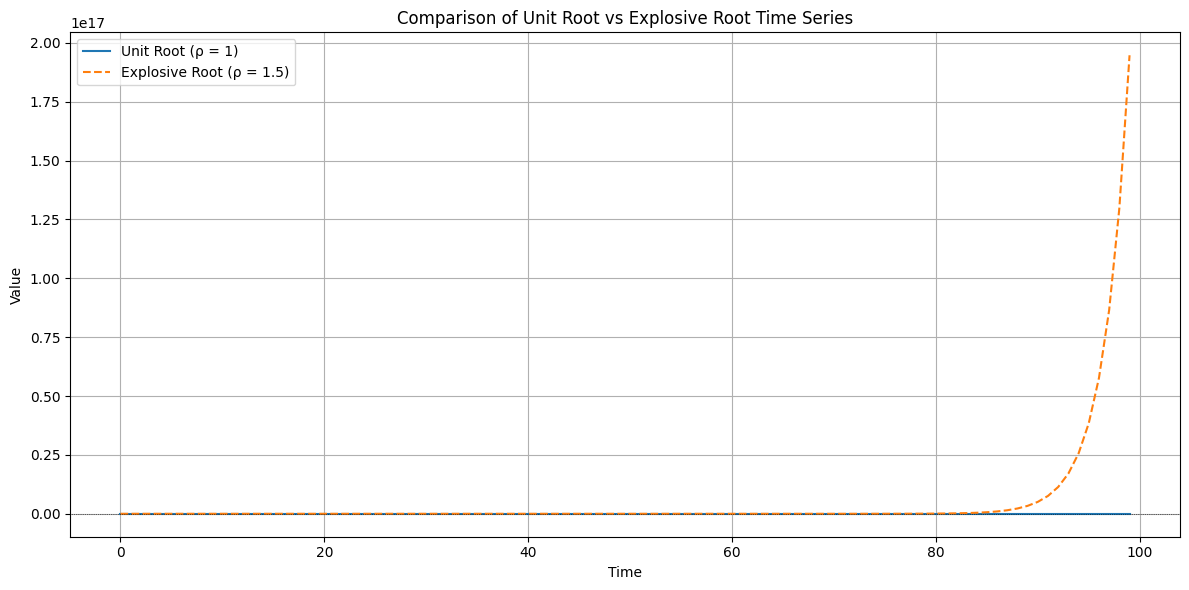

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulation settings
np.random.seed(42)
n = 100
epsilon = np.random.normal(0, 1, n)

# Case 1: Unit root (rho = 1)
y_unit_root = [0]
for t in range(1, n):
    y_unit_root.append(y_unit_root[t-1] + epsilon[t])
y_unit_root = pd.Series(y_unit_root, name="Unit Root (ρ = 1)")

# Case 2: Explosive root (rho = 1.5)
y_explosive = [0]
for t in range(1, n):
    y_explosive.append(1.5 * y_explosive[t-1] + epsilon[t])
y_explosive = pd.Series(y_explosive, name="Explosive Root (ρ = 1.5)")

# Plot both series
plt.figure(figsize=(12, 6))
plt.plot(y_unit_root, label='Unit Root (ρ = 1)')
plt.plot(y_explosive, label='Explosive Root (ρ = 1.5)', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.title("Comparison of Unit Root vs Explosive Root Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
